In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pumpkins = pd.read_csv('../02/US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date', 'City Num', 'Variety Num']


pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month


new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


In [3]:
new_pumpkins.describe()

,Month,Low Price,High Price,Price
count,415.000000,415.000000,415.000000,415.000000
mean,9.838554,18.007831,18.989759,27.707010
std,0.748885,5.273335,5.694920,9.815351
min,8.000000,10.750000,12.000000,10.909091
25%,9.000000,15.000000,17.000000,16.363636
50%,10.000000,17.000000,18.000000,30.000000
75%,10.000000,18.000000,19.000000,35.000000
max,12.000000,48.000000,55.000000,51.500000


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.636364
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.363636
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.363636
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,15.454545
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.636364
...,...,...,...,...,...,...,...
1738,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,30.000000
1739,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,28.750000
1740,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,25.750000
1741,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.000000


In [6]:
new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.636364
71,1,3,1,0,10,7,16.363636
72,2,3,1,0,10,7,16.363636
73,2,3,1,0,9,6,15.454545
74,2,3,1,0,5,3,13.636364
...,...,...,...,...,...,...,...
1738,1,1,9,2,5,3,30.000000
1739,1,1,9,2,3,3,28.750000
1740,1,1,9,2,0,3,25.750000
1741,1,1,9,2,1,0,24.000000


In [7]:
new_pumpkins['City'].corr(new_pumpkins['Price'])

0.3236397181608923

In [8]:
new_pumpkins.isnull().sum()

Month         0
Variety       0
City          0
Package       0
Low Price     0
High Price    0
Price         0
dtype: int64

In [9]:
X, y = new_pumpkins[['Package']].values, new_pumpkins['Price'].values

In [10]:
X.shape

(415, 1)

In [11]:
y.shape

(415,)

In [12]:
from sklearn import model_selection
from sklearn import linear_model

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [14]:
from sklearn import metrics

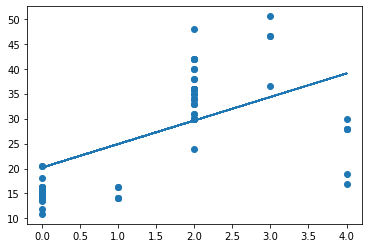

In [15]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred)
plt.show()

In [16]:
model.predict([[2.75]])

array([33.15655975])

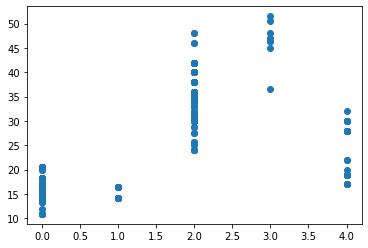

In [17]:
plt.scatter(X, y)
plt.show()

In [18]:
metrics.r2_score(y_train, model.predict(X_train))

0.3315342327998989

### Polynomial linear regression

In [19]:
new_columns = ['Variety', 'Package', 'City', 'Month', 'Price']
poly_pumpkins = new_pumpkins[new_columns]

In [20]:
poly_pumpkins.head()

,Variety,Package,City,Month,Price
70,3,0,1,1,13.636364
71,3,0,1,1,16.363636
72,3,0,1,2,16.363636
73,3,0,1,2,15.454545
74,3,0,1,2,13.636364


In [21]:
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,Variety,Package,City,Month,Price
Variety,1.000000,-0.614855,-0.248441,0.171330,-0.863479
Package,-0.614855,1.000000,0.301604,-0.144847,0.606171
City,-0.248441,0.301604,1.000000,-0.188728,0.323640
Month,0.171330,-0.144847,-0.188728,1.000000,-0.148783
Price,-0.863479,0.606171,0.323640,-0.148783,1.000000


In [22]:
poly_pumpkins

,Variety,Package,City,Month,Price
70,3,0,1,1,13.636364
71,3,0,1,1,16.363636
72,3,0,1,2,16.363636
73,3,0,1,2,15.454545
74,3,0,1,2,13.636364
...,...,...,...,...,...
1738,1,2,9,1,30.000000
1739,1,2,9,1,28.750000
1740,1,2,9,1,25.750000
1741,1,2,9,1,24.000000


In [23]:
X, y = poly_pumpkins[['Package']].values, poly_pumpkins['Price'].values

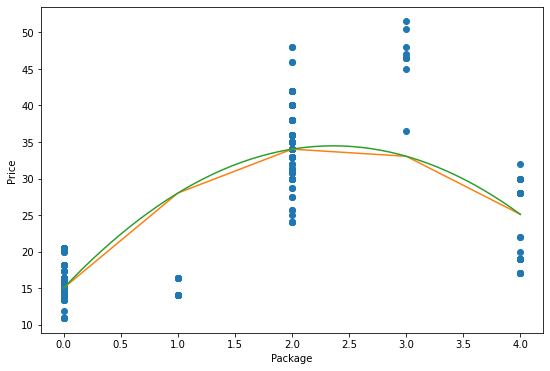

In [24]:
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_test)


# y_pred = [t for _, t in sorted(zip(X_test, y_pred))]
# X_test = sorted(X_test)

X_test = X_test.T[0]
index = np.argsort(X_test)
y_pred = y_pred[index]
X_test = X_test[index]

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
plt.plot(X_test, y_pred, color='C1')
plt.xlabel('Package')
plt.ylabel('Price')

plt.scatter(X, y)

X_lin = np.linspace(0, 4, 50)
y_lin = pipeline.predict(np.array([X_lin]).T)
plt.plot(X_lin, y_lin, color='C2')

plt.show()


In [25]:
pipeline.predict([[2.75]])

array([33.94623163])

In [26]:
import numpy as np
from mpl_toolkits import mplot3d

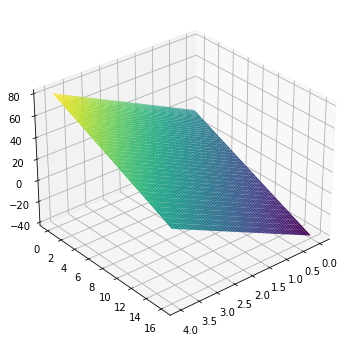

In [33]:
%matplotlib inline
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')

X_plot = np.linspace(0, 4.0, 50)
X_plot_square = X_plot**2

count1 = 0
count2 = 0
y_plot = np.zeros((50,50))
for x in X_plot:
    for xx in X_plot_square:
        y_plot[count1][count2] = pipeline.named_steps.linearregression.predict([[1, x, xx]])
        count2 = count2 + 1
    count2 = 0
    count1 = count1 + 1
        
y_plot = np.array(y_plot)

X_plot, X_plot_square = np.meshgrid(X_plot, X_plot_square)


ax.plot_surface(X_plot, X_plot_square, y_plot.T, cmap='viridis')
ax.view_init(azim=50)
plt.show()

In [28]:
pipeline.named_steps.linearregression.intercept_

15.033238647794718

In [29]:
pipeline.named_steps.linearregression.coef_

array([ 0.        , 16.47151   , -3.48874837])

In [30]:
pipeline.named_steps.polynomialfeatures.powers_

array([[0],
       [1],
       [2]])